In [1]:
import pandas as pd
import numpy as np

#### Normalization (Min-Max Scalling)

In [2]:
from sklearn.preprocessing import MinMaxScaler
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

In [3]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [4]:
print(scaler.transform(data))

[[0.25806452 0.45454545]
 [1.         1.        ]
 [0.         0.        ]
 [0.08064516 0.13636364]
 [0.16129032 0.27272727]]


#### Standardization (Z-Score)

In [5]:
from sklearn import preprocessing
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

In [6]:
scaler = preprocessing.StandardScaler().fit(data)

In [7]:
data = scaler.transform(data)
data

array([[-0.11638732,  0.23521877],
       [ 1.94277296,  1.80334389],
       [-0.83261698, -1.07155217],
       [-0.60879521, -0.67952089],
       [-0.38497344, -0.28748961]])

#### Train Test Split Dataset

In [8]:
    # from sklearn.model_selection import train_test_split
    # x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1 )

In [9]:
from sklearn.model_selection import train_test_split

X_data = range(10)
y_data = range(10)

print("random_state ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state=42)
    print(y_test)


print("random_state tidak ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=None)
    print(y_test)

random_state ditentukan
[8, 1, 5]
[8, 1, 5]
[8, 1, 5]
random_state tidak ditentukan
[6, 9, 1]
[0, 1, 4]
[8, 0, 7]


#### Latihan SKLearn Train Test Split

In [10]:
import sklearn
from sklearn import datasets

In [11]:
iris = datasets.load_iris()

In [12]:
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [13]:
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [14]:
x = iris.data
y = iris.target

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

 > Ketika kita print panjang dari x_test, kita bisa melihat bahwa panjang dari atribut test set adalah 30 sampel, sesuai dengan parameter yang kita masukkan pada fungsi train_test_split yaitu 0.2 atau 20% dari 150 sampel. Kode untuk print panjang dari x_test seperti di bawah ini.

In [16]:
len(x_test)

30

#### Latihan SKLearn Cross Validation Split

In [17]:
import sklearn
from sklearn import datasets

iris = datasets.load_iris()

In [18]:
# mendefinisikan atribut dan label pada dataset
x=iris.data
y=iris.target

In [19]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

In [20]:
from sklearn.model_selection import cross_val_score

# mengevaluasi performa model dengan cross_val_score
scores = cross_val_score(clf, x, y, cv=5)  # cv merupakan jumlah fold yang dipakai pada cross validation

> Secara umum jika hasil dari pengujian tiap fold pada cross validation memiliki nilai yang bervariasi dari 0.85 sampai 0.99, maka model tersebut dapat dikatakan baik.

In [21]:
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

#### Latihan SKLearn Decision Tree

In [78]:
import pandas as pd

iris = pd.read_csv('Iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [79]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
iris.drop('Id', axis=1, inplace=True)

In [81]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']
 
# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [82]:
from sklearn.tree import DecisionTreeClassifier
 
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
 
# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [83]:
# Evaluasi Model
from sklearn.metrics import accuracy_score
 
y_pred = tree_model.predict(X_test)
 
acc_secore = round(accuracy_score(y_pred, y_test), 3)
 
print('Accuracy: ', acc_secore)

Accuracy:  0.933


In [84]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


c:\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [85]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

#### Latihan SKLearn Linear Regression

In [30]:
import numpy as np

# buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

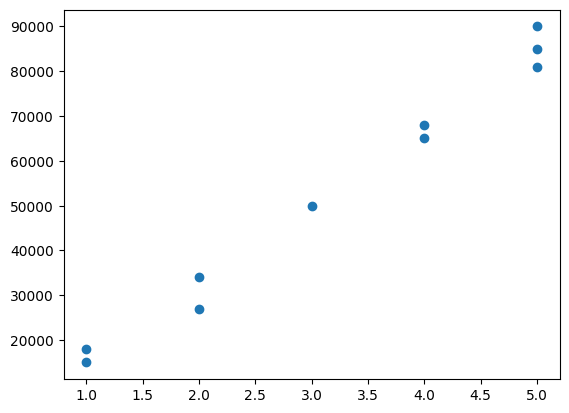

In [31]:
# menampilkan scatter plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)

In [32]:
 from sklearn.linear_model import LinearRegression

# latih model dengan linear regression fit
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression()

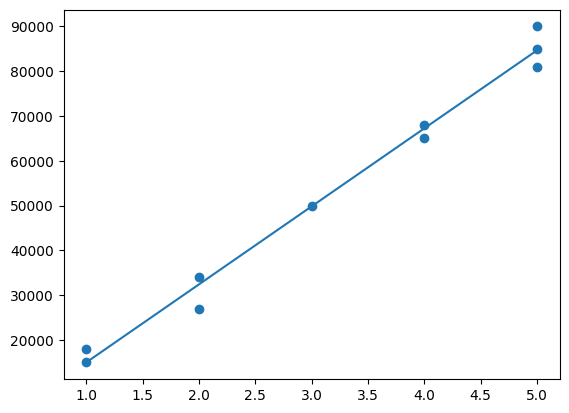

In [33]:
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))   

#### Latihan SKLearn Logistic Regression

In [34]:
import pandas as pd
 
# membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv('Social_Network_Ads.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [36]:
# drop kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])
 
# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [37]:
# pisahkan atribut dan label
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased'] 

In [38]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

In [40]:
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
model.score(X_test, y_test)

0.825

#### Latihan SKLearn K-means

In [42]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [44]:
# ubah nama kolom
df= df.rename(columns={'Gender': 'gender', 'Age': 'age',
                       'Annual Income (k$)': 'annual_income', 
                       'Spending Score (1-100)': 'spending_score'})

df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [45]:
from sklearn.cluster import KMeans
 
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
 
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

Text(0, 0.5, 'Inertia')

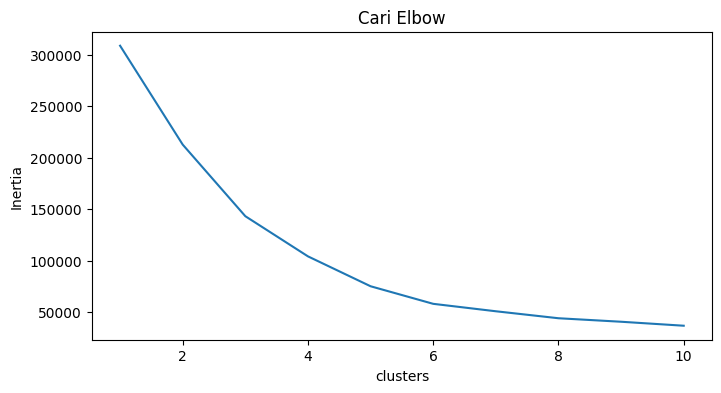

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('Inertia')

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


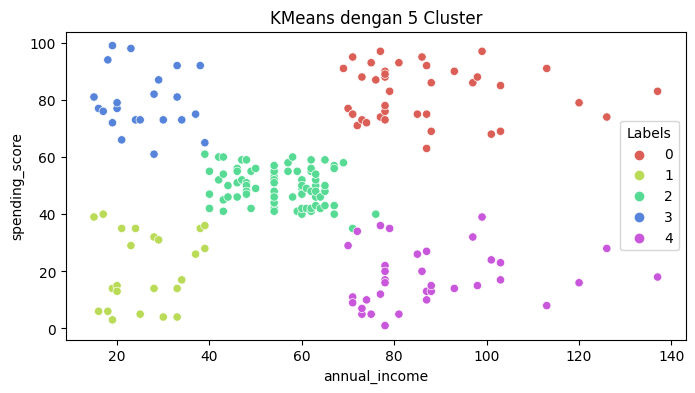

In [47]:
# membuat objek KMeans
import seaborn as sns
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

#### Latihan SKLearn PCA 

In [48]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
atribut = iris.data
label = iris.target

X_train, X_test, y_train, y_test = train_test_split(atribut, label, test_size=0.2, random_state=1)

In [49]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)
#Tampilan hasil akurasi tanpa PCA dari kode di atas sebagai berikut.

0.9666666666666667

In [50]:
from sklearn.decomposition import PCA

# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)

# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)

# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.92848323, 0.04764372, 0.01931005, 0.004563  ])

In [51]:
# PCA dengan 2 principal component
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [52]:
# uji akurasi classifier
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

0.9333333333333333

#### Latihan SKLearn SVM untuk Klasifikasi

In [53]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
## memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [56]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [57]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler

# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [59]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.svm import SVC

# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [61]:
# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)


0.7559055118110236

#### Latihan SKLearn SVR 

In [62]:
import pandas as pd
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [64]:
import numpy as np

# memisahkan atribut dan label
X = df['YearsExperience']
y = df['Salary']

# mengubah bentuk atribut
X = X[:,np.newaxis]

C:\Users\muham\AppData\Local\Temp\ipykernel_9316\3129432910.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


In [65]:
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR(C=1000, gamma=0.05, kernel='rbf')

# melatih model dengan fungsi fit
model.fit(X, y)

SVR(C=1000, gamma=0.05)

In [66]:
# model.score(X, y)

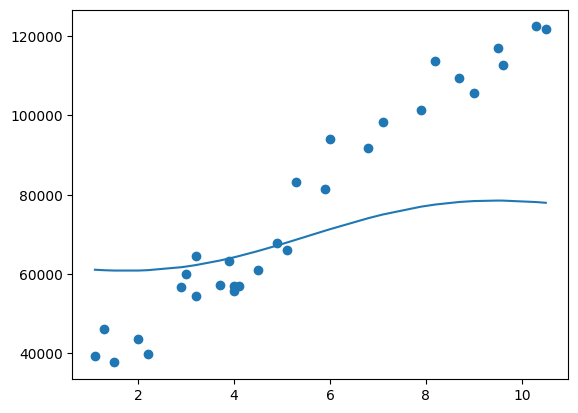

In [67]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, model.predict(X))

#### Latihan SKLearn dengan Teknik Grid Search

In [68]:
import pandas as pd

df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [70]:
import numpy as np

# memisahkan atribut dan label
X = df['YearsExperience']
y = df['Salary']

# mengubah bentuk atribut
X = X[:, np.newaxis]

C:\Users\muham\AppData\Local\Temp\ipykernel_9316\2085373201.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, np.newaxis]


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel' : ['rbf'],
    'C' : [1000, 10000, 100000],
    'gamma' : [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)
 
# melatih model dengan fungsi fit
grid_search.fit(X, y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [72]:
# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [73]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X, y)

SVR(C=100000, gamma=0.005)

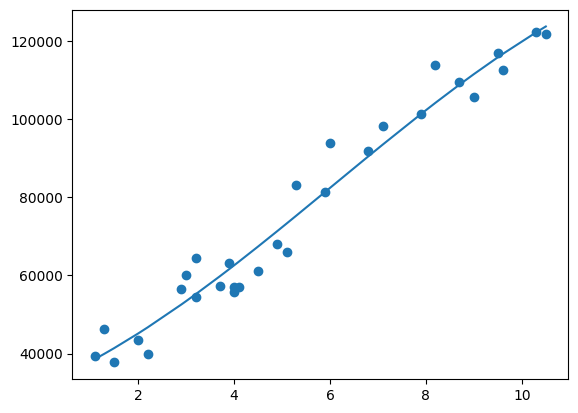

In [74]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

#### Binning

In [75]:
# data[‘bin’] = pd.cut(data[‘value’], bins=[0, 30,  70, 100], labels=[“Low”, “Mid”, “High”])
 
 
#     value    bin
# 0      13    Low
# 1      25    Low
# 2      32    Mid
# 3      94    High
# 4      49    Mid

#### Splitting

In [76]:
import pandas as pd 
 
Developer = pd.DataFrame({'Name': ['Isyana Saraswati', 'Nicholas Saputra', 'Raisa Andriana'], 
        'Age':[30, 36, 32]}) 
print("Machine Learning Developer di Indonesia :\n", Developer) 
 
Developer[['First','Last']] = Developer.Name.str.split(expand=True) 
print("\n Split kolom 'Name', lalu tambahkan kedua kolom : \n", Developer)

Machine Learning Developer di Indonesia :
                Name  Age
0  Isyana Saraswati   30
1  Nicholas Saputra   36
2    Raisa Andriana   32

 Split kolom 'Name', lalu tambahkan kedua kolom : 
                Name  Age     First       Last
0  Isyana Saraswati   30    Isyana  Saraswati
1  Nicholas Saputra   36  Nicholas    Saputra
2    Raisa Andriana   32     Raisa   Andriana
